In [14]:
import pandas as pd
df_AA=pd.read_csv('df_AG--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)
df_BB=pd.read_csv('df_BG--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)
df_AB=pd.read_csv('df_AB--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)

In [15]:
# Rename columns for df_AA, df_AB, and df_BB
df_AA, df_AB, df_BB = [df.rename(columns={0: 'cdr3', 1: 'v.segm', 2: 'species', 3: 'mhc.a', 4: 'mhc.b', 5: 'antigen.epitope', 6: 'antigen.gene', 7: 'antigen.species'}) for df in [df_AA, df_AB, df_BB]]

In [16]:
def simplify_v_segm(segment):
    if 'TR' in segment:
        parts = segment.split('*')[0].split('-')[0]
        return parts
    else:
        return 'Other'

# Test the function
input_segment = 'TRBV5-4*01'
output_segment = simplify_v_segm(input_segment)
print(output_segment)  # Output: TRBV5

# Update the "v.segm" column with simplified categories
df_BB["v.segm"] = df_BB["v.segm"].apply(simplify_v_segm)
df_AB["v.segm"] = df_AB["v.segm"].apply(simplify_v_segm)

TRBV5


In [17]:
import pandas as pd
def classify_species(species):
    # Disease-specific species
    disease_specific = {'HIV-1', 'HIV1', 'HCV', 'DENV1', 'DENV2', 'DENV3/4',
                        'MCPyV', 'HPV-16', 'EBV', 'RSV', 'VSV', 'SARS-CoV-2', 'HSV-2'}
    
    # Tissue-specific species
    tissue_specific = {'Homo sapiens', 'Mus musculus', 'Manduca sexta', 'Gallus gallus',
                       'Triticum aestivum', 'Plasmodium berghei'}
    
    # Ambiguous species
    ambiguous = {'Pseudomonas fluorescens', 'Pseudomonas aeruginosa', 'Synthetic', 'E. coli',
                 'CMV', 'HTLV-1', 'synthetic', 'Wheat', 'HomoSapiens', 'LCMV', 'YFV', 'InfluenzaA',
                 'M.tuberculosis', 'HomoSapiens', 'DENV1', 'Homo sapiens', 'HTLV-1'}
    
    # Classify species
    if species in disease_specific:
        return 'Disease-specific'
    elif species in tissue_specific:
        return 'Tissue-specific'
    elif species in ambiguous:
        return 'Ambiguous'
    else:
        return 'Unclassified'

# Apply classification function to the antigen.species column
df_BB['species_classification'] = df_BB['antigen.species'].apply(classify_species)
df_AB['species_classification'] = df_AB['antigen.species'].apply(classify_species)
df_AA['species_classification'] = df_AA['antigen.species'].apply(classify_species)

In [18]:
def detailed_classification(antigen):
    viral_antigens = {'NP', 'PA', 'M1', 'Matrix', 'pp65', 'IE1', 'EBNA1', 'EBNA6', 'LMP2A', 'BMLF1', 'Gag', 'Pol', 'Matrix', 'Tax', 'Tat', 'RSV-GP'}
    cancer_testis_antigens = {'MAGE-A1', 'MAGE-A3', 'MAGE-A4', 'MAGE-A6', 'NY-ESO-1', 'MART1', 'NY-ESO', 'CTAG1B', 'PRAME'}
    autoantigens = {'Insulin', 'MBP', 'Tyrosinase', 'SSX2', 'NY-ESO'}
    bacterial_antigens = {'CFP10', 'OVA', 'EBNA3A', 'GLIADIN'}
    protozoan_antigens = {'M1-G4E', 'LYZ', 'GLUT-L1'}
    host_cell_antigens = {'H3F3B', 'WT1', 'TERT', 'BRLF1', 'HELZ2', 'HER2', 'KRAS', 'PTEN', 'P53', 'TP53', 'ERBB2', 'SF3B1', 'COL18A1'}
    synthetic_peptides = {'Synthetic'}
    other_pathogen_antigens = {'NS3', 'NS5B', 'GTPBP1', 'NSP12'}
    miscellaneous_antigens = {'NY-ESO-2', 'PADI4', 'ASTN1', 'Ovotransferrin', 'RNF19B', 'PPM1F', 'UL49', 'NP338', 'RNF19B', 'UL40'}

    if antigen in viral_antigens:
        return 'Viral Antigens'
    elif antigen in cancer_testis_antigens:
        return 'Cancer/Testis Antigens'
    elif antigen in autoantigens:
        return 'Autoantigens'
    elif antigen in bacterial_antigens:
        return 'Bacterial Antigens'
    elif antigen in protozoan_antigens:
        return 'Protozoan Antigens'
    elif antigen in host_cell_antigens:
        return 'Host Cell Antigens'
    elif antigen in synthetic_peptides:
        return 'Synthetic Peptides'
    elif antigen in other_pathogen_antigens:
        return 'Other Pathogen Antigens'
    elif antigen in miscellaneous_antigens:
        return 'Miscellaneous Antigens'
    else:
        return 'Unclassified'

# Applying classification to df_AB
df_AB['Antigen Classification'] = df_AB['antigen.gene'].apply(detailed_classification)
# Applying classification to df_AA
df_AA['Antigen Classification'] = df_AA['antigen.gene'].apply(detailed_classification)
# Applying classification to df_BB
df_BB['Antigen Classification'] = df_BB['antigen.gene'].apply(detailed_classification)

In [19]:
df_AA_Human= df_AA[df_AA['species']=='HomoSapiens']
df_AB_Human= df_AB[df_AB['species']=='HomoSapiens']
df_BB_Human= df_BB[df_BB['species']=='HomoSapiens']
print(len(df_AA_Human), len(df_AB_Human), len(df_BB_Human))

1724 1479 4289


In [20]:
unique_elements = df_AB["antigen.gene"].unique()
unique_set = set(unique_elements)
print(unique_set)

{'ARHGAP35', 'Gp33(Y4A)', 'NY-ESO-4', 'GAP50', 'M38', 'pp65', 'Tyrosinase', 'CFP10', '5T4', 'p53', 'TPX2', 'HIVEP2', 'Rv0288', 'IE1', 'PPE33', 'MBP', 'NSP3', 'E2', 'DQ2-GLIA-OMEGA1', 'GNL3L', 'WT1', 'synthetic', 'Ovotransferrin', 'EBNA1', 'EBNA3A', 'P53', 'PMEL', 'TERT', 'DQ8-GLIA-ALPHA1', 'ASTN1', 'RFC5', 'GANAB', 'KRAS', 'MAGE-A1', 'FGFR3', 'GNB5', 'NSP12', 'P24', 'Mimotope', 'H3F3B', 'MLL2', 'COL18A1', 'KIAA1967', 'NBAS', 'LYZ', 'AMPH', 'M45', 'HER2', 'ERBB2IP', 'KIAA0368', 'Rv3616c', 'M1-G4E', 'HA', 'TPI1', 'MAGE-A3', 'Spike', 'NS3', 'AHNAK', 'ANKRD30A', 'ENR', 'MAGE-A4', 'PGM5', 'PIK3CA', 'TP53', 'NP338', 'CTBP1', 'MIM2', 'Synthetic', 'SLC30A8', 'NUP98', 'Pol', 'PDS5A', 'MLANA', 'UL49', 'MED13', 'Gtpbp1', '3K', 'SRPX', 'NY-ESO-5', 'Tax', 'MCC', 'Rv3804c', 'gp100', 'SLC3A2', 'CDK4', 'EBNA4', 'PADI4', 'P18-I10', 'BRAF', '8F10', 'RNF19B', 'NY-ESO-6', 'Mbp', 'UGGT2', 'BMLF1', 'INS', 'DQ8.5-GLIA-GAMMA1', 'SSX2', 'BZLF1', 'KIF16B', 'BCR-ABL', 'WDR46', 'CENPL', 'BRLF1', 'QL9', 'OVA', 'EB

c:\Users\Tommy\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['UMAP1'] = umap_embedding[:, 0]
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

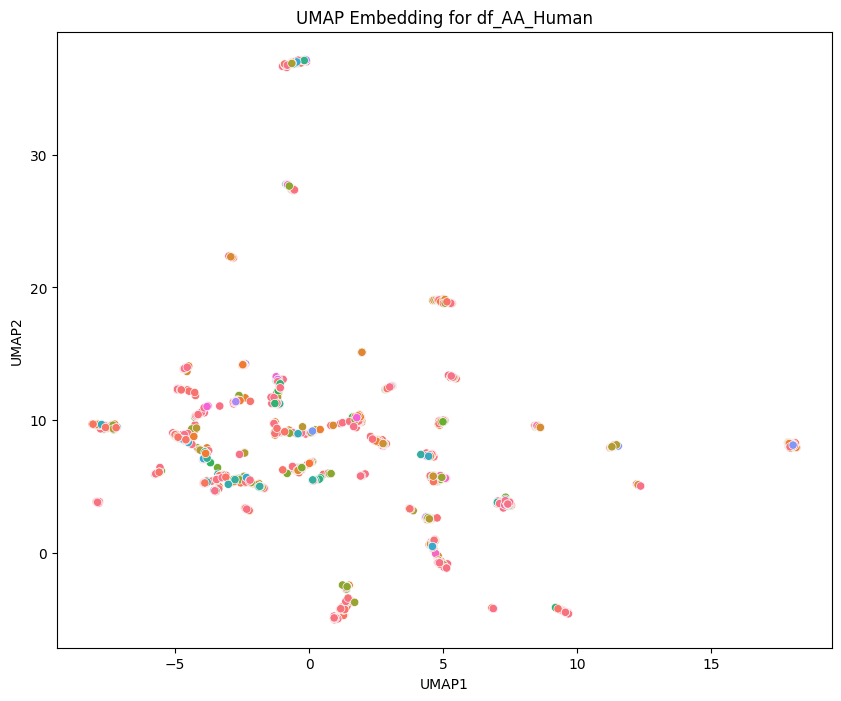

c:\Users\Tommy\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['UMAP1'] = umap_embedding[:, 0]
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

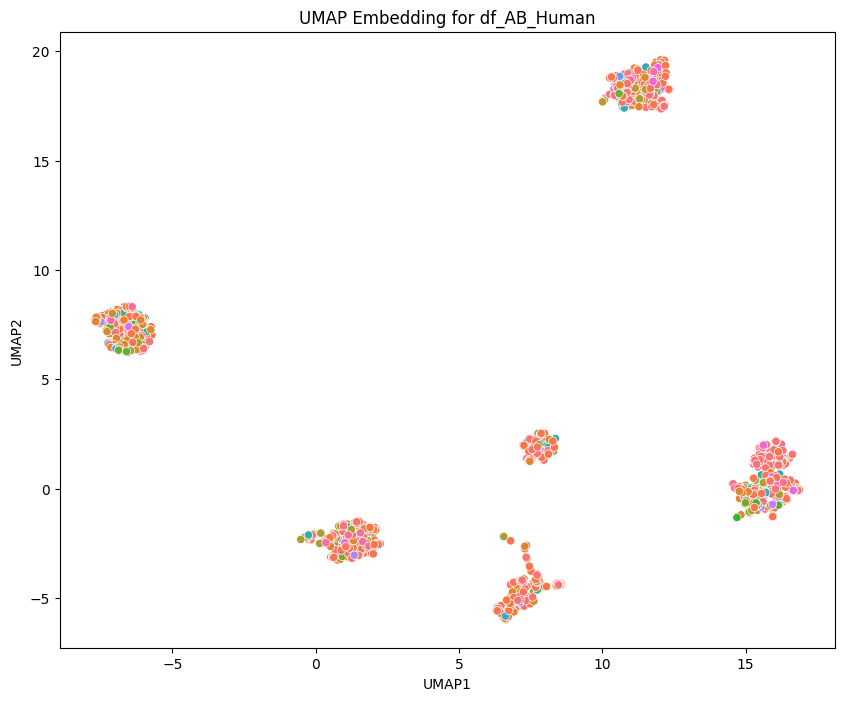

c:\Users\Tommy\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['UMAP1'] = umap_embedding[:, 0]
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\1207581028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

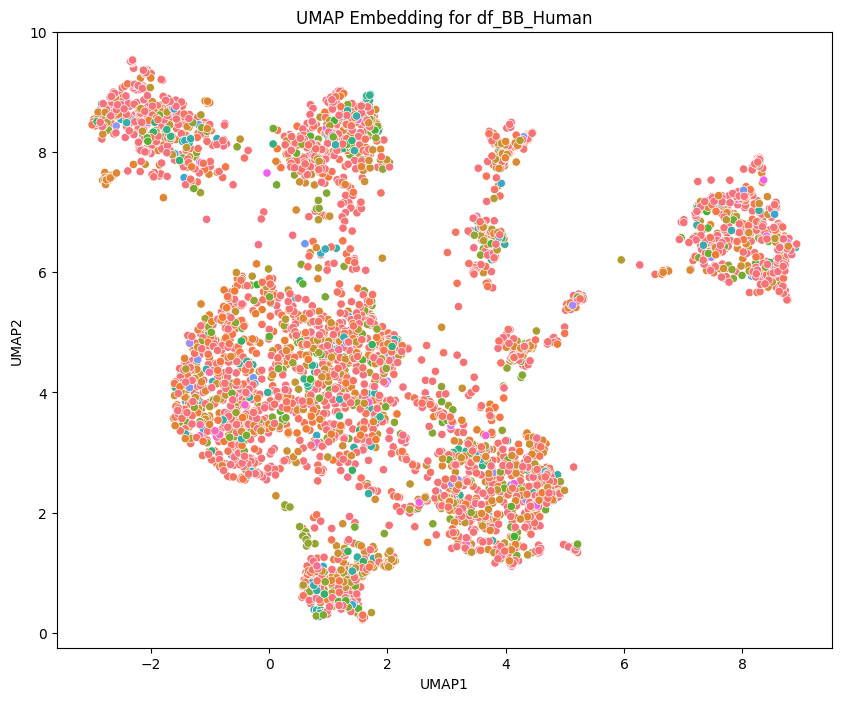

In [21]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Define datasets and their corresponding names
datasets = [df_AA_Human, df_AB_Human, df_BB_Human]
dataset_names = ['df_AA_Human', 'df_AB_Human', 'df_BB_Human']

# Iterate over datasets
for dataset, name in zip(datasets, dataset_names):
    # Compute UMAP embeddings
    umap_embedding = umap.UMAP(n_components=2,random_state=88).fit_transform(dataset.iloc[:, 8:104])
    
    # Add UMAP embeddings to the dataset
    dataset['UMAP1'] = umap_embedding[:, 0]
    dataset['UMAP2'] = umap_embedding[:, 1]
    
    # Plot the graph with hue set to antigen.species
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=dataset, x='UMAP1', y='UMAP2', hue='antigen.gene', legend=False) #palette='RdBu'
    plt.title(f'UMAP Embedding for {name}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\clust

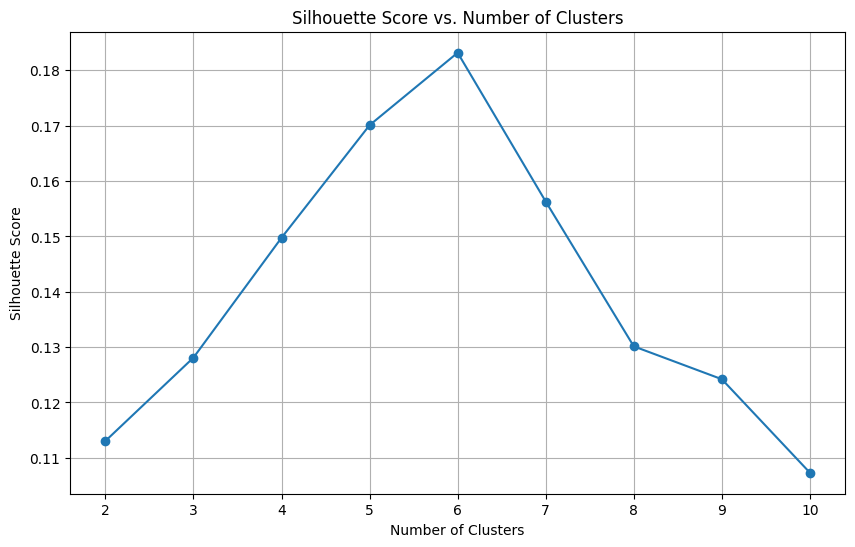

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

dataset=df_AB_Human

# Function to calculate the silhouette score for different numbers of clusters
def get_silhouette_score(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, clusters)
    return silhouette_avg

# Define the range of clusters to test
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

#dataset.iloc[:, 5:99]   #dataset[['UMAP1', 'UMAP2']]
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = [get_silhouette_score(dataset.iloc[:, 8:104], n) for n in cluster_range]

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

c:\Users\Tommy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tommy\AppData\Local\Temp\ipykernel_8564\2042902139.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = clusters


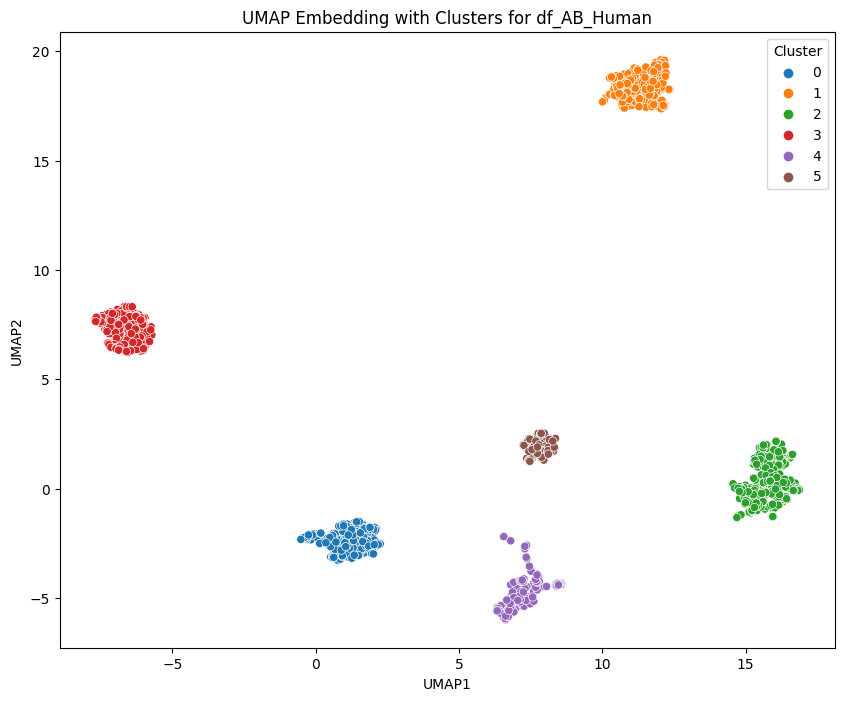

In [23]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 6 # You can adjust this as needed #9 for df_BB_Human

# Select the dataset to cluster
dataset = df_AB_Human

# Perform K-means clustering on UMAP embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(dataset[['UMAP1', 'UMAP2']])

# Add cluster labels to the dataset
dataset['Cluster'] = clusters

# Plot the clustered data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dataset, x='UMAP1', y='UMAP2', hue='Cluster', palette='tab10', legend='full')
plt.title('UMAP Embedding with Clusters for df_AB_Human')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [24]:
#antigen.species, antigen.epitope, v.segm
key='v.segm'

for cluster_label in dataset['Cluster'].unique():
    # Filter dataset by cluster label
    cluster_data = dataset[dataset['Cluster'] == cluster_label]
    
    # Extract unique antigen genes for this cluster
    unique_antigen_genes = cluster_data[key].unique()
    
    # Print cluster label and unique antigen genes
    print(f"Cluster {cluster_label}: {unique_antigen_genes}")

# Now, let's print all unique antigen genes across all clusters
all_unique_antigen_genes = dataset[key].unique()
print("\nUnique antigen genes across all clusters:", all_unique_antigen_genes)


Cluster 1: ['TRBV28' 'TRBV4' 'TRBV27' 'TRBV12' 'TRBV7' 'TRBV19' 'TRBV20' 'TRBV3'
 'TRBV5' 'TRBV10' 'TRBV25' 'TRBV9' 'TRBV2' 'TRBV15' 'TRBV30' 'TRBV29'
 'TRBV11' 'TRBV18' 'TRBV6' 'TRBV24' 'TRBV13' 'TRBV14']
Cluster 0: ['TRBV7' 'TRBV5' 'TRBV27' 'TRBV2' 'TRBV19' 'TRBV9' 'TRBV28' 'TRBV18'
 'TRBV6' 'TRBV15' 'TRBV30' 'TRBV20' 'TRBV29' 'TRBV14' 'TRBV11' 'TRBV13'
 'TRBV10' 'TRBV3' 'TRBV12' 'TRBV4' 'TRBV24' 'TRBV25']
Cluster 3: ['TRBV29' 'TRBV5' 'TRBV6' 'TRBV7' 'TRBV10' 'TRBV18' 'TRBV9' 'TRBV28'
 'TRBV20' 'TRBV27' 'TRBV19' 'TRBV4' 'TRBV2' 'TRBV13' 'TRBV16' 'TRBV15'
 'TRBV24' 'TRBV12' 'TRBV30' 'TRBV14' 'TRBV11' 'TRBV3' 'TRBV25']
Cluster 2: ['TRBV19' 'TRBV24' 'TRBV14' 'TRBV7' 'TRBV4' 'TRBV20' 'TRBV5' 'TRBV28'
 'TRBV29' 'TRBV12' 'TRBV11' 'TRBV6' 'TRBV9' 'TRBV10' 'TRBV2' 'TRBV27'
 'TRBV18' 'TRBV15' 'TRBV25' 'TRBV13' 'TRBV30' 'TRBV3']
Cluster 5: ['TRBV6' 'TRBV9' 'TRBV19' 'TRBV7' 'TRBV18' 'TRBV4' 'TRBV27' 'TRBV20'
 'TRBV24' 'TRBV11' 'TRBV12' 'TRBV10' 'TRBV5' 'TRBV29' 'TRBV14' 'TRBV28'
 'TRBV30' 'TRBV

In [25]:
# Initialize a set to keep track of unique antigen species
unique_antigen_species_seen = set()

# Iterate over each cluster
for cluster_label in dataset['Cluster'].unique():
    # Filter dataset by cluster label
    cluster_data = dataset[dataset['Cluster'] == cluster_label]
    
    # Extract unique antigen species for this cluster
    unique_antigen_species = set(cluster_data[key].unique())
    
    # Exclude antigen species already seen in other clusters
    unique_antigen_species -= unique_antigen_species_seen
    
    # Print cluster label and unique antigen species
    print(f"Cluster {cluster_label}: {unique_antigen_species}")
    
    # Update the set of unique antigen species seen so far
    unique_antigen_species_seen |= unique_antigen_species


Cluster 1: {'TRBV13', 'TRBV30', 'TRBV19', 'TRBV15', 'TRBV25', 'TRBV12', 'TRBV10', 'TRBV27', 'TRBV4', 'TRBV6', 'TRBV9', 'TRBV28', 'TRBV14', 'TRBV29', 'TRBV18', 'TRBV24', 'TRBV5', 'TRBV7', 'TRBV2', 'TRBV20', 'TRBV11', 'TRBV3'}
Cluster 0: set()
Cluster 3: {'TRBV16'}
Cluster 2: set()
Cluster 5: set()
Cluster 4: set()


No insight :(

Dataset: df_AA_Human


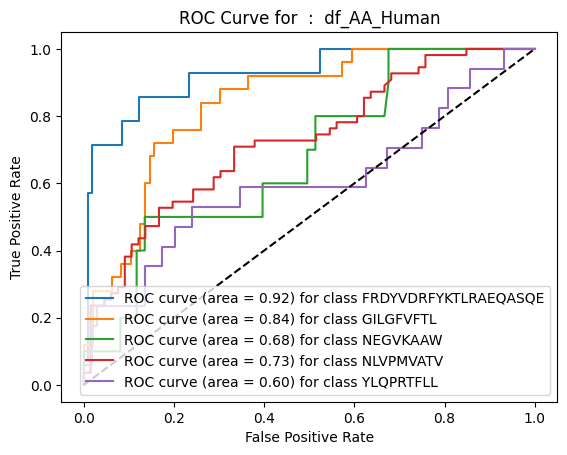

Macro-Average ROC-AUC Score for Dataset df_AA_Human : 0.7549402696000352
Precision for Dataset df_AA_Human : 0.5038246419821167
Recall for Dataset df_AA_Human : 0.5371900826446281
Accuracy for Dataset df_AA_Human : 0.5371900826446281
F1 Score for Dataset df_AA_Human : 0.5094095946046745
Dataset: df_AB_Human


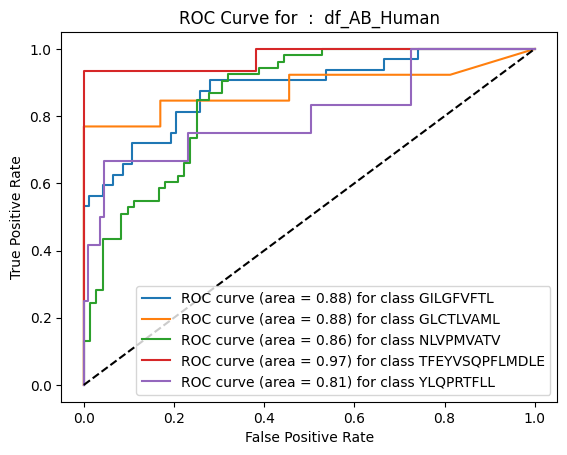

Macro-Average ROC-AUC Score for Dataset df_AB_Human : 0.8802657478474177
Precision for Dataset df_AB_Human : 0.8307076552139843
Recall for Dataset df_AB_Human : 0.768
Accuracy for Dataset df_AB_Human : 0.768
F1 Score for Dataset df_AB_Human : 0.7525272563914073
Dataset: df_BB_Human


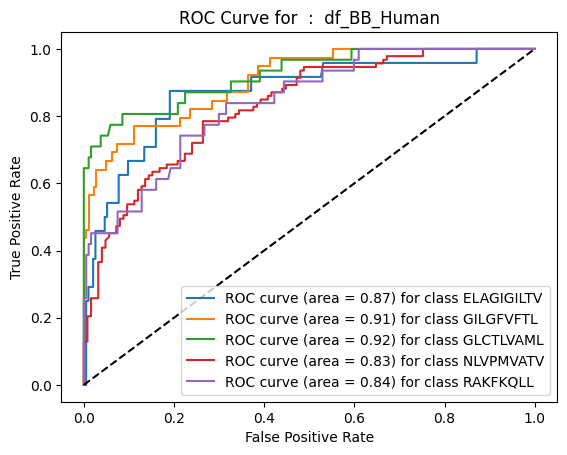

Macro-Average ROC-AUC Score for Dataset df_BB_Human : 0.8744080324020874
Precision for Dataset df_BB_Human : 0.7289000690539608
Recall for Dataset df_BB_Human : 0.6926605504587156
Accuracy for Dataset df_BB_Human : 0.6926605504587156
F1 Score for Dataset df_BB_Human : 0.6790202720602863


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder


datasets = [df_AA_Human, df_AB_Human, df_BB_Human]
dataset_names = ['df_AA_Human', 'df_AB_Human', 'df_BB_Human']

#antigen.gene, antigen.epitope, antigen.species
key="antigen.epitope"


for dataset, dataset_name in zip(datasets, dataset_names):
    print("Dataset:", dataset_name)
    X = dataset.iloc[:,8:104]
    y = dataset[key]
    
    # Get the top five highest-frequency antigens
    top_antigens = dataset[key].value_counts().head(5).index.tolist()

    # Filter dataset to include only samples with the top five antigens
    filtered_dataset = dataset[dataset[key].isin(top_antigens)]
    X_filtered = filtered_dataset.iloc[:, 8:104]
    y_filtered = filtered_dataset[key]

    # Convert the target variable to binary format
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_filtered)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_encoded, test_size=0.2, random_state=42)

    # Initialize and train Random Forest Classifier with OvR strategy
    rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=150, random_state=42))
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for test set
    y_pred_proba = rf_classifier.predict_proba(X_test)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(label_encoder.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])

    # Plot ROC curve for each class
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for  :  ' + dataset_name)
    plt.legend(loc="lower right")
    plt.show()

    # Calculate macro-average ROC-AUC score
    macro_roc_auc = roc_auc_score(label_binarize(y_test, classes=range(len(label_encoder.classes_))), y_pred_proba, average='macro')
    print("Macro-Average ROC-AUC Score for Dataset", dataset_name, ":", macro_roc_auc)

    # Performance metrics
    y_pred = rf_classifier.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    

    # Display performance metrics
    print("Precision for Dataset", dataset_name, ":", precision)
    print("Recall for Dataset", dataset_name, ":", recall)
    print("Accuracy for Dataset", dataset_name, ":", accuracy)
    print("F1 Score for Dataset", dataset_name, ":", f1)